## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Giuliano
- Apellido: Tamagno
- Legajo:1681989

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [2]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [10]:
## defino path, defino la var. de la base de datos y la muestro
root_path = ""
plot_path = root_path
diabetes_df = pd.read_csv(root_path+'ClusterAI_TP_dataset_diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [4]:
#$ Uso np.shape para ver las dimensiones del dataset
np.shape(diabetes_df)

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
# Uso .info para ver un resumen de que tipos son los datos del dataset y su cantidad de nulos
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [6]:
## Llamo a la funcion value_counts que me indica en porcetajes que distribucion tiene cada valor disponible de la variable Outcome
## Siendo 1 para personas diabéticas, 0 para las que no lo son.
diabetes_df['Outcome'].value_counts(normalize=True,dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
## Uso .describe para mostrar las metricas de las variables. Lo traspongo para ver las variables en filas
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

<Figure size 1440x432 with 0 Axes>

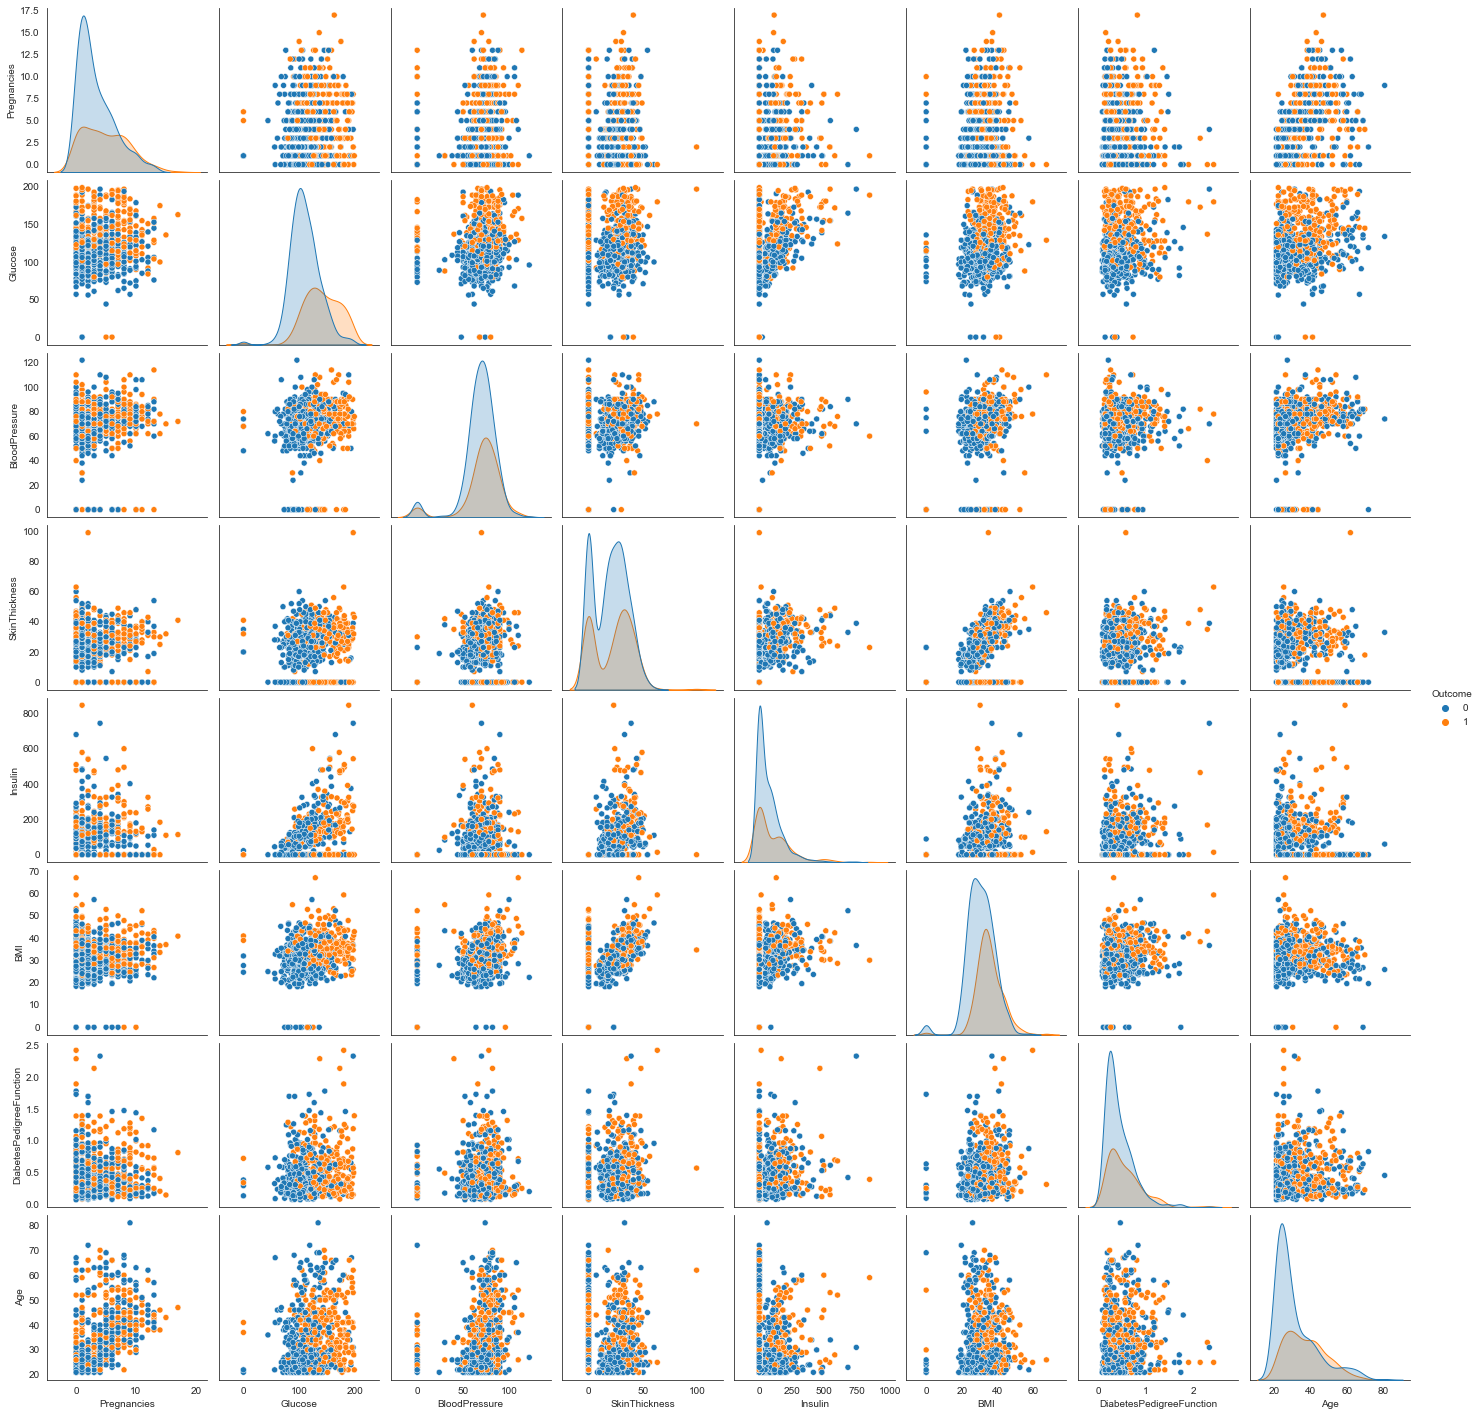

In [12]:
##Imprimo pairplot y guardo su imagen para verla pantalla completa

sns.pairplot(diabetes_df, hue="Outcome")
plot_name = "teste_img"
plot_save = str(plot_path + plot_name)
plt.savefig(plot_save+".png",dpi=300)
plt.show()

In [ ]:
## Conclusion rapida: Los valores de glucosa para los no diabeticos estan mas dispersos y tienen una media menor que los diabeticos

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

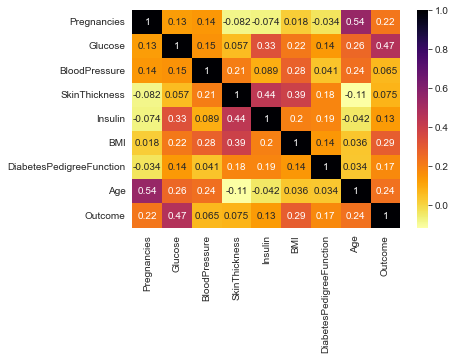

In [45]:
## Importo libreria para cambiar color
## Creo la matriz donde se van a alojar los resultados de .corr()
## Muestro heatmap con su valor de correlacion lineal en cada par de variables

import matplotlib.cm as cm
corrmat = diabetes_df.corr()
sns.heatmap(corrmat,cmap='inferno_r', annot = True);




In [ ]:
## Los dos pares de variables mas correlacionadas son:
## Age-Pregnancie  // valor=0.54 // tipo correlacion: positiva
## Glucosa-Outcome // valor=0.47 // tipo correlacion: positiva
## Puedo notar cierta dependencia lineal entre las Glucosa y ser Diabetico, por lo que llevar un registro de la glucosa parece ser un buen primer paso a lo hora de querer detectar si alguien es diabetico o no


##### **Objetivo 8**
Hacer un histograma de la variable BMI

<AxesSubplot:xlabel='BMI', ylabel='Count'>

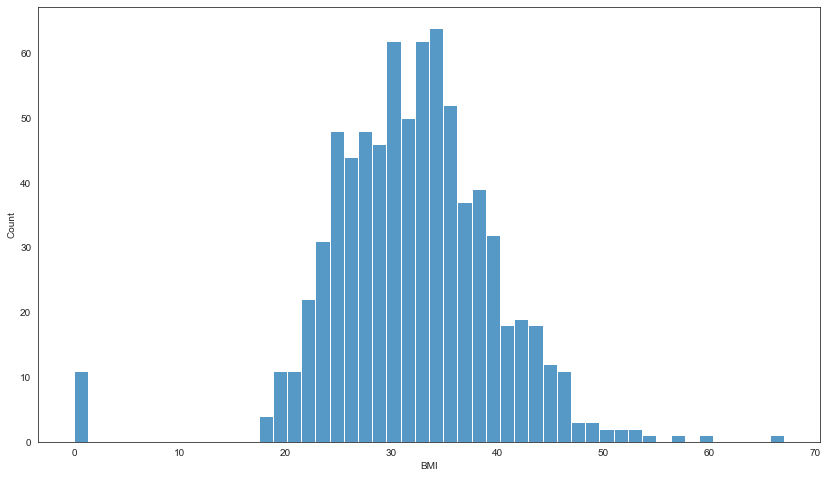

In [59]:
## Hago histograma, le ajusto el tamaño del grafico y de los bins a gusto
plt.figure(figsize=(14,8))
sns.histplot(data=diabetes_df ,x= "BMI",bins=50)

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

<AxesSubplot:ylabel='BMI'>

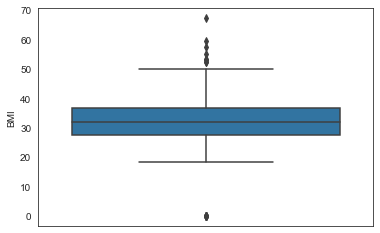

In [63]:
#3 Hago boxplot de la variable BMI
sns.boxplot(data = diabetes_df, y = "BMI")

In [ ]:
## Observo valoeres outliers cuando BMI<20 y BMI>50

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

<AxesSubplot:ylabel='BMI'>

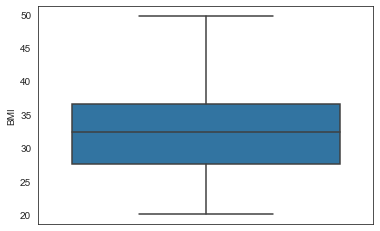

In [66]:
## Filtro primero los BMI>50
## Luego los BMI<20
# Printeo boxplot para corroborar

BMI_50=diabetes_df[diabetes_df["BMI"]<50]
BMI_20=BMI_50[BMI_50["BMI"]>20]
sns.boxplot(data = BMI_20, y = "BMI")

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

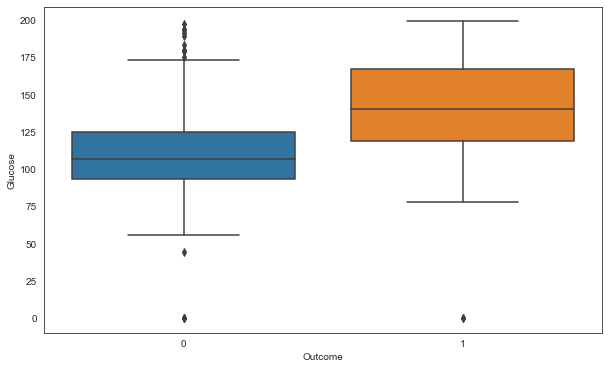

In [80]:
## Creo y acomodo boxplot
plt.figure (figsize=(10,6))
sns.boxplot(data = diabetes_df, x='Outcome', y='Glucose')

In [ ]:
## Puedo observar que los valores el primer cuartil de los diabeticos se encuentra por encima del segundo cuartil no los diabeticos
## Es decir, los diabeticos normalmete cuentan con un nivel de glucosa en sangre significativamente mayor a los no diabeticos 

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

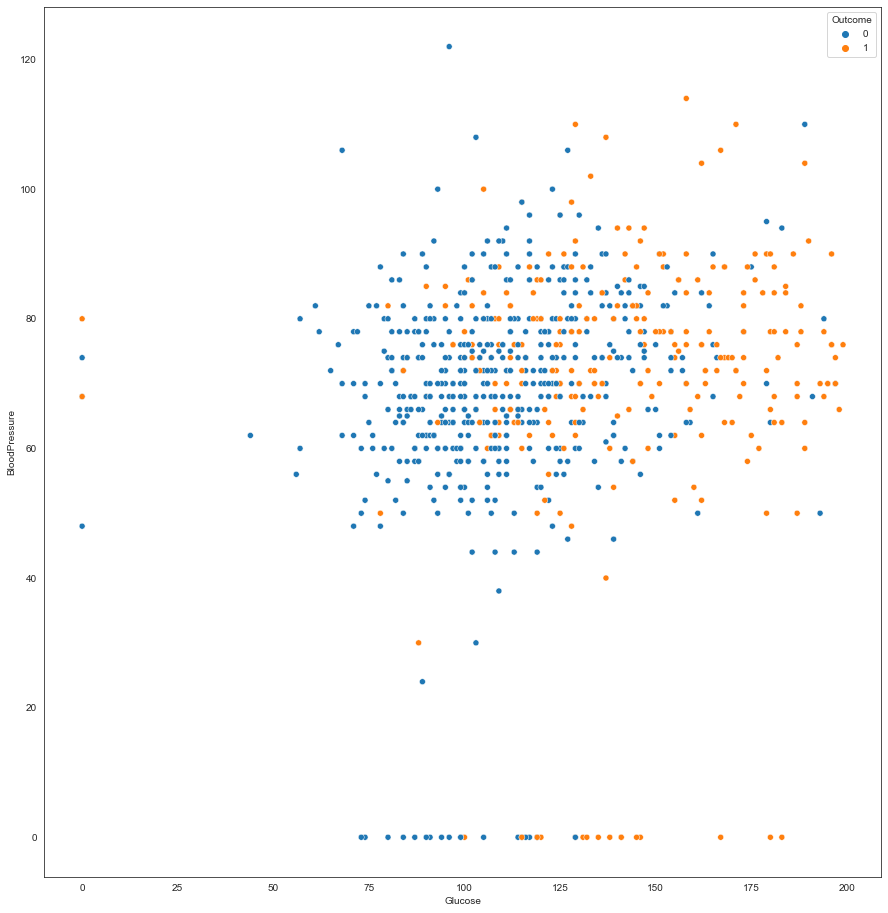

In [89]:
## Hago Scatterplot
plt.figure (figsize=(15,16))
sns.scatterplot(x="Glucose",y="BloodPressure",data=diabetes_df, hue = "Outcome" )

In [ ]:
## No observo una relacion entre ambas variables, la presion sanguinea no presenta agrupamiento alguna
## Se puede ver nuevamente como a partir de los valor 125 para glucosa a la derecha esta en su mayoria pintado de naranja y a su izquierda de azul


##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [94]:
#Creo la variables y catalogo los datos segun rangos de edad
diabetes_df.loc[(diabetes_df['Age'] > 0) & (diabetes_df['Age'] <= 30), 'Rango edad'] = 1
diabetes_df.loc[(diabetes_df['Age'] > 30) & (diabetes_df['Age'] <= 40), 'Rango edad'] = 2
diabetes_df.loc[(diabetes_df['Age'] > 40) , 'Rango edad'] = 3
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango,Rango edad
0,6,148,72,35,0,33.6,0.627,50,1,3.0,3.0
1,1,85,66,29,0,26.6,0.351,31,0,2.0,2.0
2,8,183,64,0,0,23.3,0.672,32,1,2.0,2.0
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1.0
4,0,137,40,35,168,43.1,2.288,33,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,3.0,3.0
764,2,122,70,27,0,36.8,0.340,27,0,1.0,1.0
765,5,121,72,23,112,26.2,0.245,30,0,1.0,1.0
766,1,126,60,0,0,30.1,0.349,47,1,3.0,3.0


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

<AxesSubplot:xlabel='Rango edad', ylabel='count'>

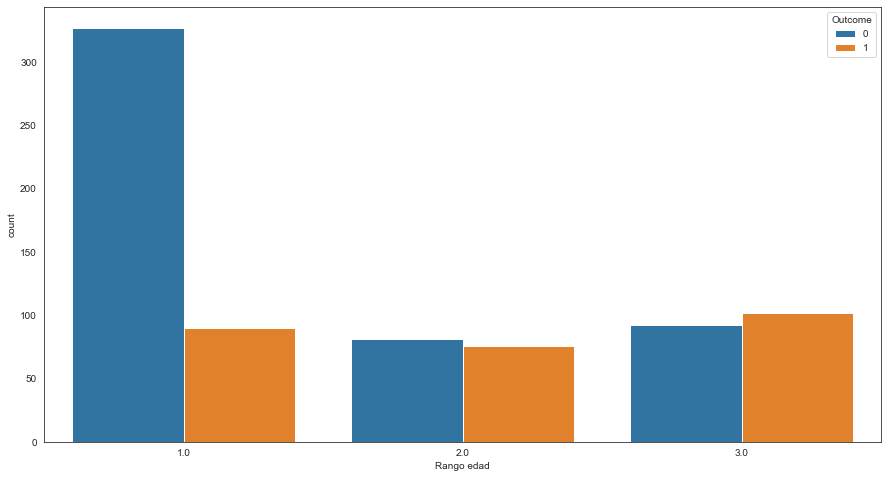

In [100]:
## Hago countplot y acomodo tamaño
plt.figure (figsize=(15,8))
sns.countplot(x='Rango edad',data=diabetes_df, hue="Outcome")

In [ ]:
## Se puede observar una clara desproporcion en el rango de edad 1 (<30), podria deberse a que todavia no saben que saben son diabeticos.
## Una posible explicacion sea porque la diabetes tipo II es aquella que  suele aparecer en edades medias donde es desencadanada por largos periodods de malos habitos alimenticios y salud.
## Siguiendo con esta linea, esto explicaria porque al envejecer esta propocion de diabetico/no-diabetico se equilibra.
 